<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Multilabel_car_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d julichitai/multilabel-small-car-and-color-dataset

 96% 230M/241M [00:02<00:00, 121MB/s] 
100% 241M/241M [00:02<00:00, 84.2MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile("/content/multilabel-small-car-and-color-dataset.zip",'r')
zip.extractall("/content/multilabel-small-car-and-color")
zip.close()

In [5]:
directory=os.path.join('/content/multilabel-small-car-and-color')

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,  # Example: random rotation
    width_shift_range=0.2,  # Example: random horizontal shift
    height_shift_range=0.2,  # Example: random vertical shift
    shear_range=0.2,  # Example: random shear
    zoom_range=0.2,  # Example: random zoom
    horizontal_flip=True,  # Example: random horizontal flip
    fill_mode='nearest'  # Example: how to fill missing pixels
)

In [7]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 2191 images belonging to 9 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 544 images belonging to 9 classes.


In [9]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

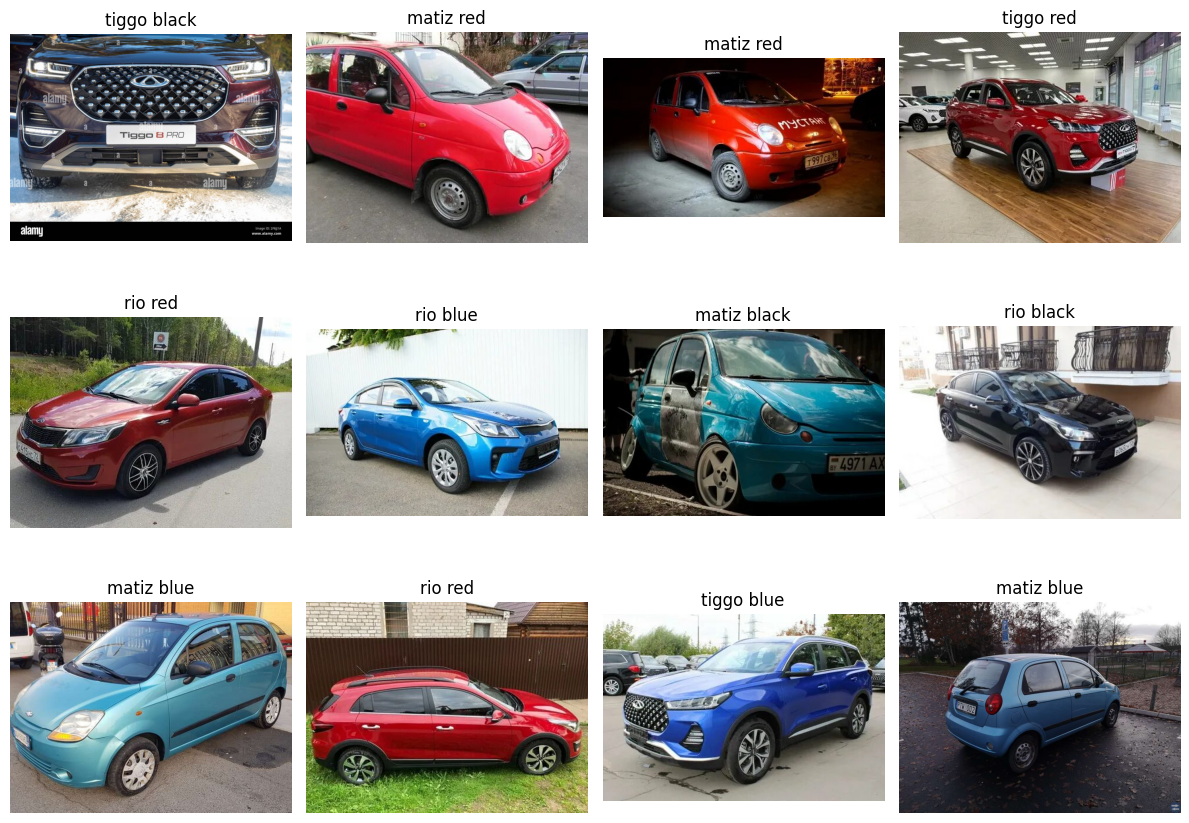

In [10]:
import random
from PIL import Image


filenames = train_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = directory + "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### **Now lets start creating CNN Network**

In [11]:
# Initializing the first CNN model
model1 = tf.keras.Sequential()

# Creating the CNN model
model1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.1))

# The third convolution
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model1.add(Flatten())

# 512 neuron hidden layer
model1.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model1.add(Dense(9, activation='softmax'))  # Corrected to 9 output neurons

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [13]:
model1.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [14]:
history1=model1.fit(train_generator,validation_data=validation_generator,epochs=50,batch_size=64)

Epoch 1/50
69/69 [==============================] - 81s 966ms/step - loss: 2.4992 - accuracy: 0.2246 - val_loss: 1.4668 - val_accuracy: 0.4118
Epoch 2/50
69/69 [==============================] - 59s 856ms/step - loss: 1.3603 - accuracy: 0.3989 - val_loss: 1.2073 - val_accuracy: 0.4357
Epoch 3/50
69/69 [==============================] - 60s 867ms/step - loss: 1.2475 - accuracy: 0.4491 - val_loss: 1.2294 - val_accuracy: 0.4614
Epoch 4/50
69/69 [==============================] - 59s 854ms/step - loss: 1.1669 - accuracy: 0.4733 - val_loss: 1.1677 - val_accuracy: 0.5055
Epoch 5/50
69/69 [==============================] - 58s 841ms/step - loss: 1.1211 - accuracy: 0.5139 - val_loss: 1.0333 - val_accuracy: 0.5129
Epoch 6/50
69/69 [==============================] - 58s 844ms/step - loss: 1.0692 - accuracy: 0.5395 - val_loss: 1.0761 - val_accuracy: 0.5276
Epoch 7/50
69/69 [==============================] - 59s 855ms/step - loss: 1.0698 - accuracy: 0.5208 - val_loss: 0.9165 - val_accuracy: 0.6140

In [15]:
loss,acc=model1.evaluate(validation_generator)
print("Model1's Accuracy:-",acc)
print("Model1's Loss:-",loss)

17/17 [==============================] - 14s 808ms/step - loss: 0.7230 - accuracy: 0.6875
Model1's Accuracy:- 0.6875
Model1's Loss:- 0.7229668498039246


In [16]:
import matplotlib.pyplot as plt

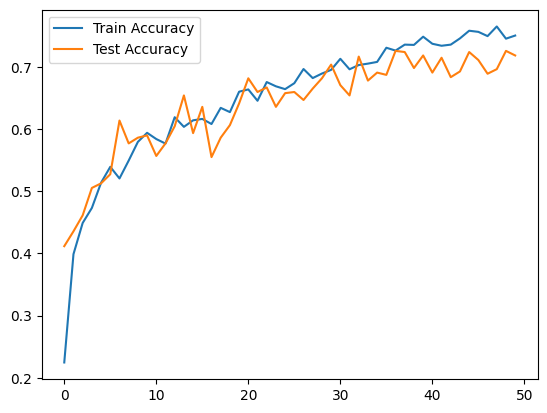

In [17]:
plt.plot(history1.history['accuracy'],label="Train Accuracy")
plt.plot(history1.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.show()

In [18]:
# Initializing the first CNN model
model2 = tf.keras.Sequential()

# Creating the CNN model
model2.add(Conv2D(228, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model2.add(Conv2D(144, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.1))

# The third convolution
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model2.add(Flatten())

# 512 neuron hidden layer
model2.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model2.add(Dense(9, activation='softmax'))  # Corrected to 9 output neurons

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 228)     6384      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 126, 126, 228)     0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 228)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 144)     295632    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 144)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 144)      

In [20]:
model2.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [21]:
history2=model2.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=50)

Epoch 1/50
69/69 [==============================] - 89s 1s/step - loss: 1.8706 - accuracy: 0.2880 - val_loss: 1.3361 - val_accuracy: 0.3805
Epoch 2/50
69/69 [==============================] - 79s 1s/step - loss: 1.3201 - accuracy: 0.3898 - val_loss: 1.2212 - val_accuracy: 0.4228
Epoch 3/50
69/69 [==============================] - 78s 1s/step - loss: 1.2762 - accuracy: 0.3971 - val_loss: 1.2281 - val_accuracy: 0.3897
Epoch 4/50
69/69 [==============================] - 77s 1s/step - loss: 1.2241 - accuracy: 0.4340 - val_loss: 1.1215 - val_accuracy: 0.4724
Epoch 5/50
69/69 [==============================] - 78s 1s/step - loss: 1.1912 - accuracy: 0.4701 - val_loss: 1.1293 - val_accuracy: 0.4926
Epoch 6/50
69/69 [==============================] - 77s 1s/step - loss: 1.1308 - accuracy: 0.4760 - val_loss: 1.0429 - val_accuracy: 0.5110
Epoch 7/50
69/69 [==============================] - 77s 1s/step - loss: 1.1157 - accuracy: 0.5021 - val_loss: 1.0983 - val_accuracy: 0.5037
Epoch 8/50
69/69 [==

In [26]:
loss2,acc2=model2.evaluate(validation_generator)
print("Model 2 loss:-",loss2)
print("Model 2 Accuracy:-",acc2)

17/17 [==============================] - 24s 1s/step - loss: 0.7083 - accuracy: 0.7151
Model 2 loss:- 0.7083001136779785
Model 2 Accuracy:- 0.7150735259056091


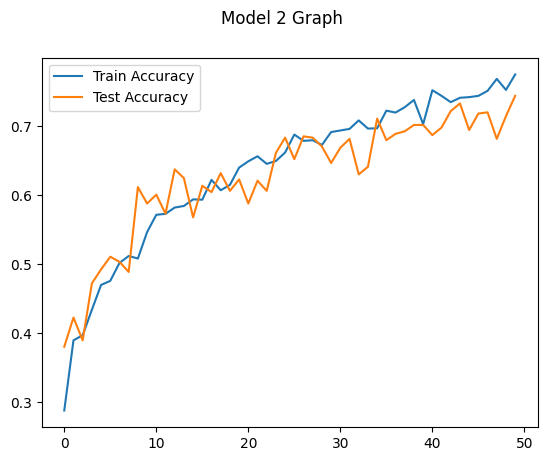

In [27]:
plt.plot(history2.history['accuracy'],label="Train Accuracy")
plt.plot(history2.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.suptitle("Model 2 Graph")
plt.show()

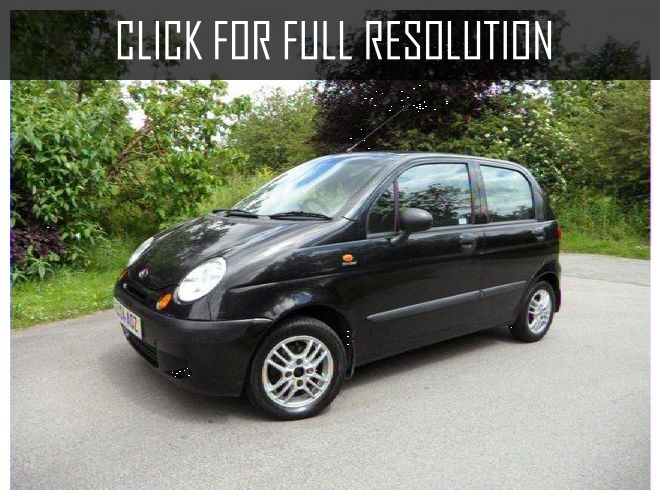

In [33]:
testing_1=Image.open("/content/multilabel-small-car-and-color/matiz black/000001.jpg")
testing_1

In [41]:
resized_img=testing_1.resize((255,255))

In [48]:
targeted_img=keras.preprocessing.image.img_to_array(resized_img)

In [49]:
targeted_img = np.expand_dims(targeted_img, axis=0)

In [51]:
model2.predict(targeted_img)

1/1 [==============================] - 0s 483ms/step


array([[1.160743e-13, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00]], dtype=float32)

In [52]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

#### **as we can see like above predict we got impressive because almost correct only**

##### GitHub Link:- https://github.com/rkgupta7463/ML-projects-code/blob/decc2e350b9a72c8ae7f2d8fc5cc133499fe32f7/Multilabel_car_Classifications.ipynb